In [1]:
%matplotlib inline

from the top level directory, install the **swel** package with pip:

`> pip install .`



In [2]:
from swel.buoy import Buoy
b = Buoy(46054)
(E,f) = b.read_data(b.get_data())

In [3]:
from swel.swel import Swel as sw
s = sw(E,f)
SWH = s.calc_swh()

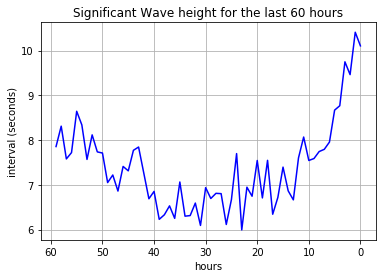

In [4]:
import matplotlib.pyplot as plt

signif_waves = SWH[0:60]*3.28

fig, ax = plt.subplots()
ax.plot(signif_waves, 'b')
plt.gca().invert_xaxis()
ax.set(xlabel='hours', ylabel='interval (seconds)',
       title='Significant Wave height for the last 60 hours')
ax.grid()

In [5]:
#E = np.array([[1,2,3,4],[3,3,3,3],[2,4,6,8]])
#f = np.array([[.5,1,2,3],[.5,1,1,2],[.5,1,2,2]])

#print ("f:\n",f)

#sample_ndx =2
#plt.plot(f[sample_ndx,:])

In [6]:
#import seaborn as sns
#sns.set(style="darkgrid")
#tips = sns.load_dataset("tips")
#sns.relplot(x="total_bill", y="tip", data=tips);
#print(type(tips))
#tips.columns